In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')
loanid=test.copy()
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

Assumptions: 
1. Smaller the Loan Amount and more the Applicants' Income more should be the chances of loan being approved
2. Previous debt should be already repaid for new Loan to be easily approved
3. Loan Amount Term should be low

In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Target Variable

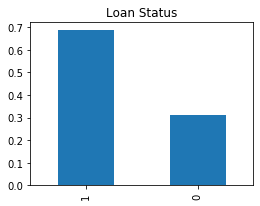

In [6]:
#Converting Loan Status Approval to 1 and Denial to 0
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(4,3), title='Loan Status')

Around 69% Loans were approved in the dataset given

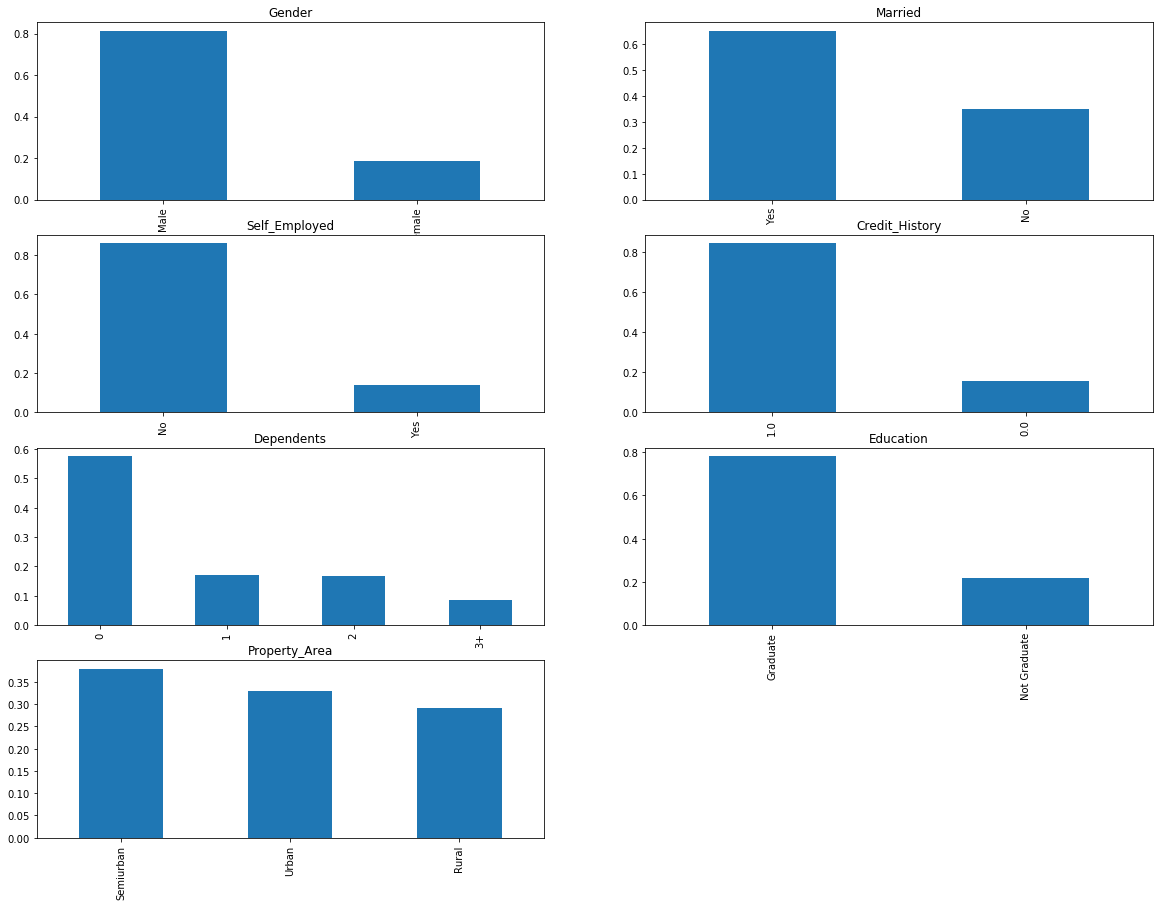

In [7]:
plt.figure(1) 
plt.subplot(421)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,15), title= 'Gender') 
plt.subplot(422)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(423)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(424)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.subplot(425)
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents') 
plt.subplot(426)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(427)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

From Above graphs it can be inferred that
1. Nearly 80% applicants are Male
2. Around 65% are Married
3. More than 80% people have paid their loans before and this may be one of the reasons for such high number of Loan approvals
4. More than half of the total number of people have no dependents
5. Around 77% people are Graduate
6. Most of the people belong to Semi-urban area

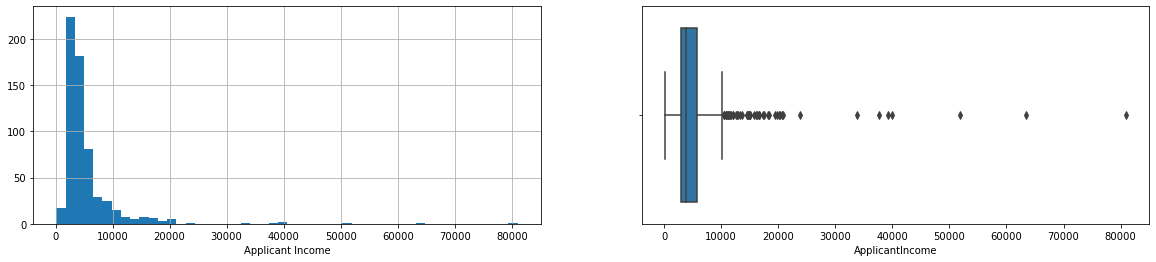

In [8]:
plt.figure(2,figsize=(20,4))
plt.subplot(121)
train['ApplicantIncome'].hist(bins=50)
plt.xlabel('Applicant Income')
plt.subplot(122)
sns.boxplot(x='ApplicantIncome',data=train)

As shown in the figure above, the graph is right skewed due to the outliers presend in the data, which are shown through the boxplot. These outliers must be handled else can affect the accuracy of the model

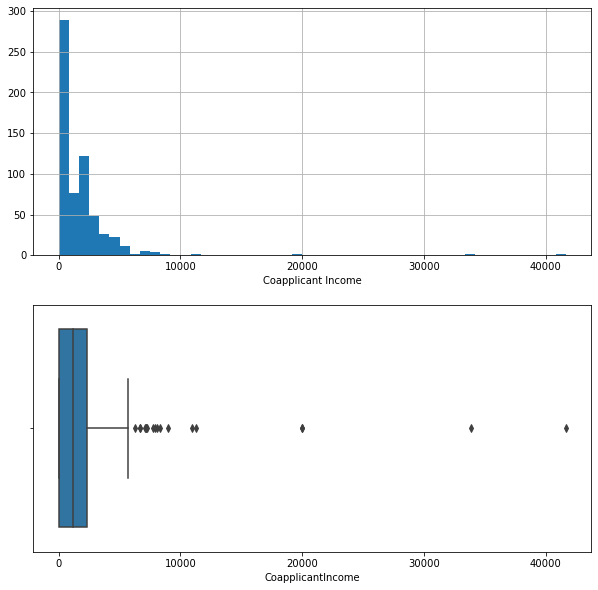

In [9]:
plt.figure(2,figsize=(10,10))
plt.subplot(211)
train['CoapplicantIncome'].hist(bins=50)
plt.xlabel('Coapplicant Income')
plt.subplot(212)
sns.boxplot(x='CoapplicantIncome',data=train)

Coapplicant Income graph is also Right skewed and the outliers present must be handled properly

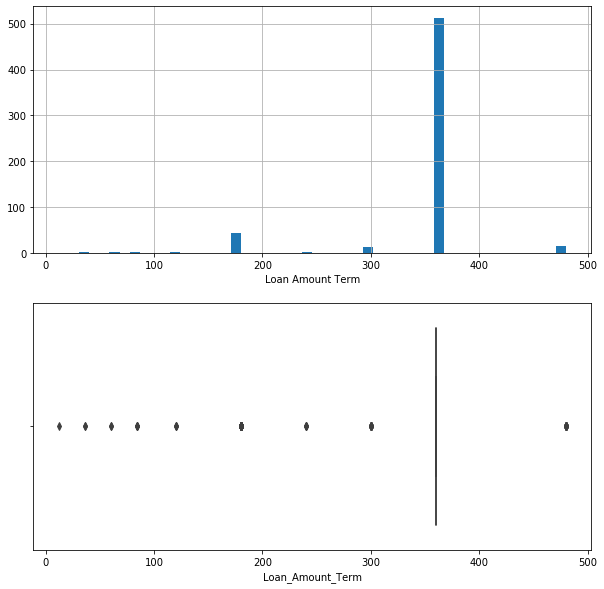

In [10]:
plt.figure(2,figsize=(10,10))
plt.subplot(211)
train['Loan_Amount_Term'].hist(bins=50)
plt.xlabel('Loan Amount Term')
plt.subplot(212)
sns.boxplot(x='Loan_Amount_Term',data=train)

Loan Amount Term have descrete data with most people applying for a Loan Amount Term of 360 months

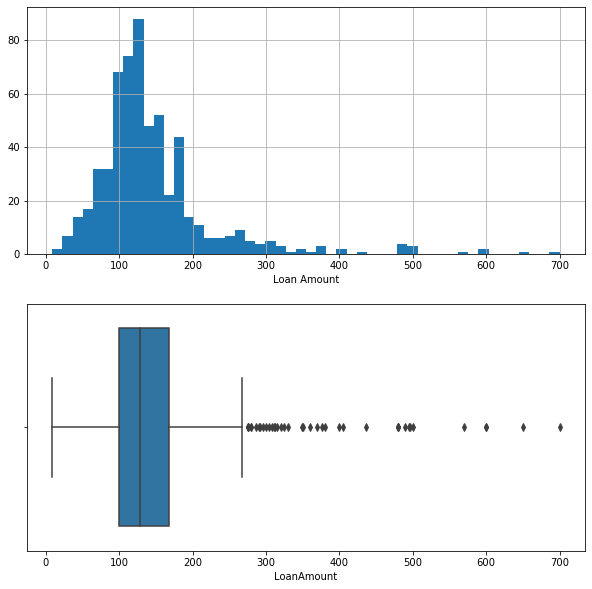

In [11]:
plt.figure(2,figsize=(10,10))
plt.subplot(211)
train['LoanAmount'].hist(bins=50)
plt.xlabel('Loan Amount')
plt.subplot(212)
sns.boxplot(x='LoanAmount',data=train)

Distribution is almost Normal but there are still a lot of outliers present

Now lets see how the features are related to the Loan Status and Lets start with the assumptions we made in the start

1. Smaller the Loan Amount and more the Applicants' Income more should be the chances of loan being approved

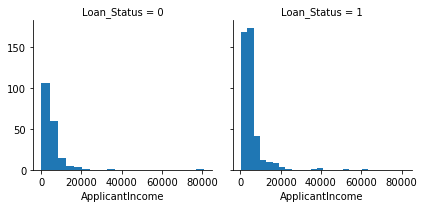

In [12]:
g=sns.FacetGrid(train,col='Loan_Status')
g.map(plt.hist,'ApplicantIncome',bins=20)

Contrary to our assumptions Applicants with low income have more Loans approved. It may be due to the loan amount, credit history or Loan amount term

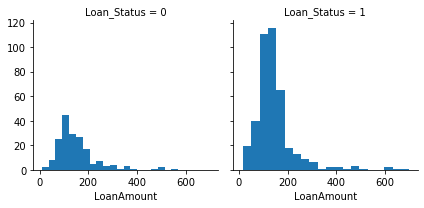

In [13]:
g=sns.FacetGrid(train,col='Loan_Status')
g.map(plt.hist,'LoanAmount',bins=20)

The graph supports the that lesser the Loan Amount more the chances of Loan being aproved

2. Previous debt should be already repaid for new Loan to be easily approved

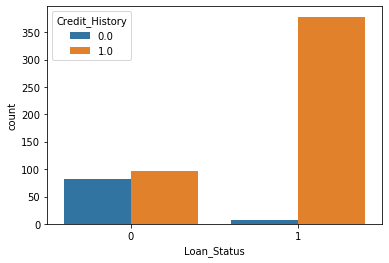

In [14]:
sns.countplot(x='Loan_Status',hue='Credit_History',data=train)

It supports our hypothesis that previous debt should be paid first for easy approval of Loan

3. Loan Amount Term should be low

<Figure size 576x288 with 0 Axes>

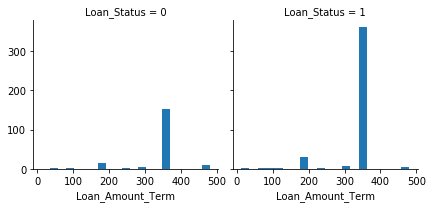

In [15]:
plt.figure(figsize=[8,4])
g=sns.FacetGrid(train,col='Loan_Status')
g.map(plt.hist,'Loan_Amount_Term',bins=20)

Even for high Loan Amount Term Loan is Approved. One of the possible reasons is most of the people taking Loan for this period

In [16]:
train[['Gender','Loan_Status']].groupby(['Gender'],as_index=False).mean().sort_values(by='Loan_Status',ascending=False)

,Gender,Loan_Status
1,Male,0.693252
0,Female,0.669643


Graph shows Loan status does depend much on the Gender of the Applicant

In [17]:
train[['Education','Loan_Status']].groupby(['Education'],as_index=False).mean().sort_values(by='Loan_Status',ascending=False)

,Education,Loan_Status
0,Graduate,0.708333
1,Not Graduate,0.611940


Graduates are slightly more likely to get Loan approved

In [18]:
train[['Married','Loan_Status']].groupby(['Married'],as_index=False).mean().sort_values(by='Loan_Status',ascending=False)

,Married,Loan_Status
1,Yes,0.716080
0,No,0.629108


In [19]:
train[['Dependents','Loan_Status']].groupby(['Dependents'],as_index=False).mean().sort_values(by='Loan_Status',ascending=False)

,Dependents,Loan_Status
2,2,0.752475
0,0,0.689855
1,1,0.647059
3,3+,0.647059


In [20]:
train[['Self_Employed','Loan_Status']].groupby(['Self_Employed'],as_index=False).mean().sort_values(by='Loan_Status',ascending=False)

,Self_Employed,Loan_Status
0,No,0.686000
1,Yes,0.682927


Loan Status is not much affected due to Self_Employed

Multivariate Analysis

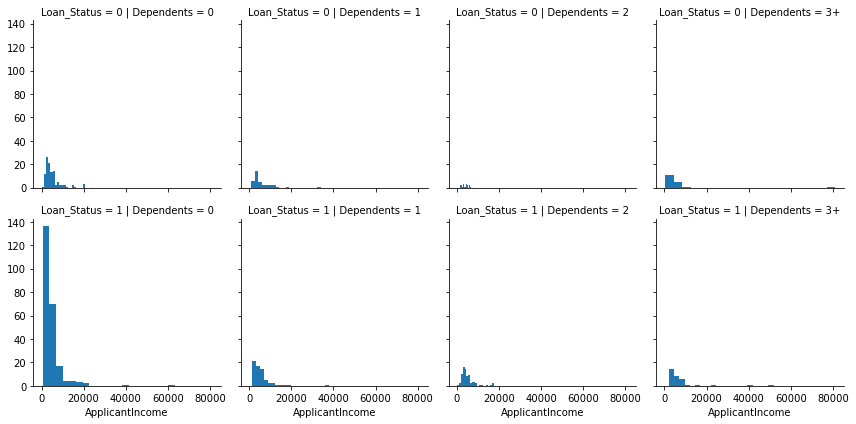

In [21]:
g=sns.FacetGrid(train,col='Dependents',row='Loan_Status')
g.map(plt.hist,'ApplicantIncome',bins=20)

For lesser Applicant Income and Dependents 3 or more than 3 almost equal number of loans have been approved and denied
Also its relatively easier to get loan even at low Applicant Income with no dependents



Now lets calculate the missing values

In [22]:
dataset=[train,test]

In [23]:
for combine in dataset:
    combine['Gender'].fillna(combine['Gender'].mode()[0], inplace=True)
    combine['Married'].fillna(combine['Married'].mode()[0], inplace=True)
    combine['Dependents'].fillna(combine['Dependents'].mode()[0], inplace=True)
    combine['Self_Employed'].fillna(combine['Self_Employed'].mode()[0], inplace=True)
    combine['Credit_History'].fillna(combine['Credit_History'].mode()[0], inplace=True)
    combine['Loan_Amount_Term'].fillna(combine['Loan_Amount_Term'].mode()[0], inplace=True)

We can not use the same method for Loan Amount. As it contains numerical data mean should have been used, but mean is highly affected due to outliers. One of the possible solution is we use Logarithmic function which will make the skewed distribution normal

In [24]:
train['Log_LoanAmount']=np.log(train['LoanAmount'])
test['Log_LoanAmount']=np.log(test['LoanAmount'])

In [25]:
train['Log_LoanAmount'].fillna(train['Log_LoanAmount'].mean(), inplace=True)
test['Log_LoanAmount'].fillna(test['Log_LoanAmount'].mean(), inplace=True)

In [26]:
train.drop(['LoanAmount'],axis=1,inplace=True)
train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['LoanAmount'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)

In [27]:
Property_train=pd.get_dummies(train['Property_Area'],drop_first=True)
train=pd.concat([train,Property_train],axis=1)
Property_test=pd.get_dummies(test['Property_Area'],drop_first=True)
test=pd.concat([test,Property_test],axis=1)

In [28]:
dataset=[train,test]
for combine in dataset:
    combine['Dependents']=combine['Dependents'].replace('3+',3)
    combine['Gender']=combine['Gender'].map({'Male':1,'Female':0})
    combine['Education']=combine['Education'].map({'Graduate':1,'Not Graduate':0})
    combine['Married']=combine['Married'].map({'No':0,'Yes':1})
    combine['Self_Employed']=combine['Self_Employed'].map({'Yes':1,'No':0})
    combine.drop(['Property_Area'],axis=1,inplace=True)
    combine['Net_Income']=combine['ApplicantIncome']+combine['CoapplicantIncome']
    combine.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [29]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Log_LoanAmount,Semiurban,Urban,Net_Income
0,1,0,0,1,0,360.0,1.0,1,4.857444,0,1,5849.0
1,1,1,1,1,0,360.0,1.0,0,4.852030,0,0,6091.0
2,1,1,0,1,1,360.0,1.0,1,4.189655,0,1,3000.0
3,1,1,0,0,0,360.0,1.0,1,4.787492,0,1,4941.0
4,1,0,0,1,0,360.0,1.0,1,4.948760,0,1,6000.0


In [30]:
status=train.Loan_Status
data=train.drop(['Loan_Status'],axis=1)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(),data,status,cv=2,scoring='accuracy').mean()

0.8061889250814332

In [32]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(),data,status,cv=5,scoring='accuracy').mean()

0.7752765560442489

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
i=1
score=0
kf=StratifiedKFold(n_splits=2,random_state=1,shuffle=True)
for train_index,test_index in kf.split(data,status):
    xtr,xvl = data.loc[train_index],data.loc[test_index]
    ytr,yvl = status[train_index],status[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    print(accuracy_score(yvl,pred_test))
    score+= accuracy_score(yvl,pred_test)
    i=i+1
pred_test = model.predict(test)
score/2

0.8208469055374593
0.7915309446254072


0.8061889250814332

In [34]:
submission=pd.read_csv('sample_submission_49d68Cx.csv')
submission['Loan_Status']=pred_test
submission['Loan_ID']=loanid['Loan_ID']
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [38]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
